<style>
.text_cell_render h1 {
font-family: Arial, serif;
}
</style>
<h1 align="center">The Mel-Spectrogram</h1>

The mel-spectrogram is a scale of pitches in which equal distances between its units (mels) are perceived to be equidistant by the human auditory system. As frequency increases, the distance between mels increases. The mel-spectrogram logarithmically renders frequencies above a certain frequency (usually 1000hz).
<br><br>
The mel-spectrogram remaps the values in hertz to mel scale.
<br><br>
The mel-spectrogram is ideal for applications that need to model human hearing perception.
<br><br>
It differs from the linear frequency representation in two ways:<br>
  * In a linearly-scaled spectrogram, The distance between 1000hz and 2000hz is half the distance between 2000hz and 4000hz; in a mel-spectrogram, those two distances are considered equal.
  * A mel-spectrogram is produced by multiplying the original spectrogram values by a filter bank.
  
The sample builds the filter bank from a series of overlapping triangular windows at a series of evenly spaced mels. The number of elements in a single frame in a mel spectrogram is equal to the number of filters in the filter bank.

In [27]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from librosa import display
import librosa

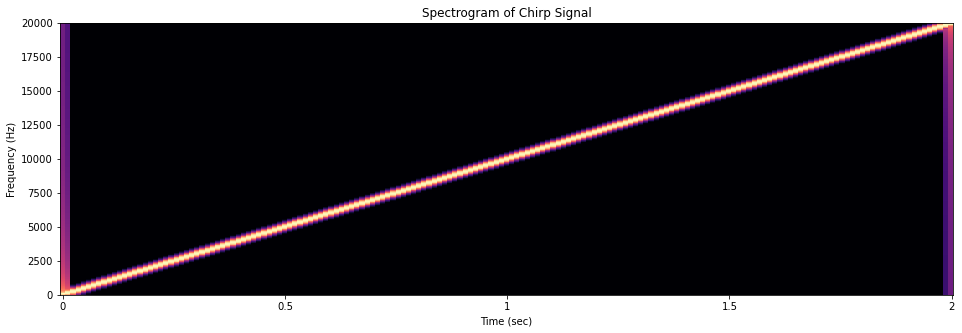

In [95]:
Fs = 44100
duration = 2
times = np.linspace(0, duration, duration*Fs)
f0 = 20
f1 = 20000

chirp = signal.chirp(times, f0, duration, f1, method="linear")

plt.figure(figsize=(16, 5))
specgram = librosa.stft(y=chirp)
specgram = librosa.amplitude_to_db(specgram)
librosa.display.specshow(specgram, sr=Fs, y_axis="hz", x_axis="time", cmap="magma");
plt.title("Spectrogram of Chirp Signal")
plt.ylim([0, 20000])
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)");

<h2>The triangular filter banks</h2>

Dimensions of filter bank: (10, 1025)


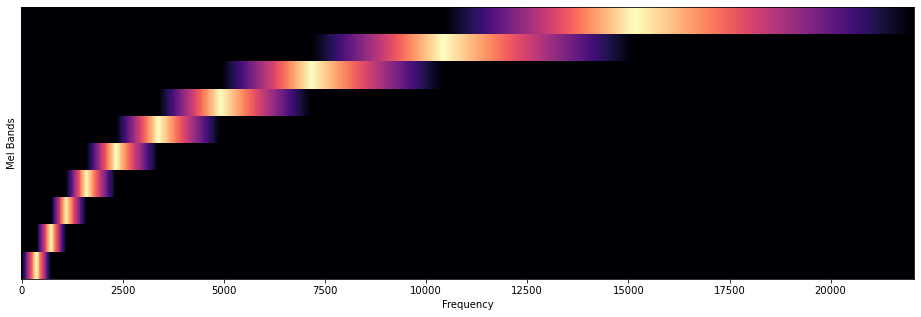

In [152]:
mel_filter_bank = librosa.filters.mel(n_mels=10, sr=Fs, norm=None, n_fft=2048)
print("Dimensions of filter bank:", mel_filter_bank.shape)

plt.figure(figsize=(16, 5))
librosa.display.specshow(mel_filter_bank, x_axis="hz", sr=44100)
plt.ylabel("Mel Bands")
plt.xlabel("Frequency");

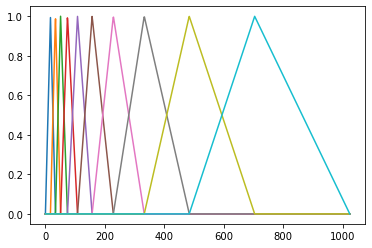

In [155]:
mel_filter_bank
plt.plot(mel_filter_bank.T, );

<h2>The resulting chirp after matrix multiplication with the mel filter bank</h2>

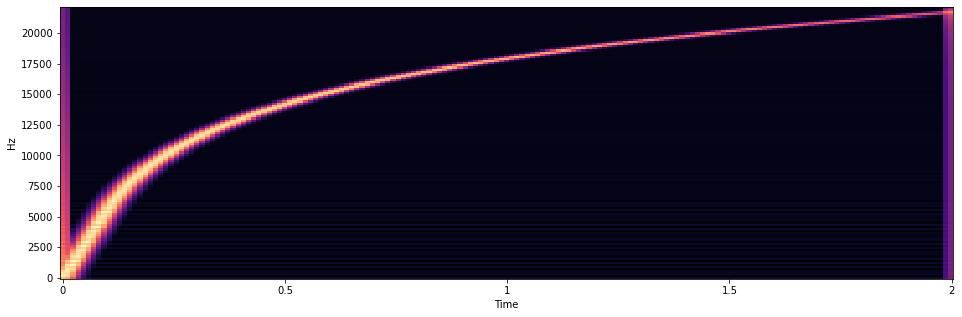

In [149]:
plt.figure(figsize=(16, 5))
mel_filter_bank_128_bands = librosa.filters.mel(n_mels=128, sr=Fs, n_fft=2048)
librosa.display.specshow(np.matmul(mel_filter_bank_128_bands, specgram), sr=Fs, x_axis="time", y_axis="linear", cmap="magma");